In [178]:
import spacy
import pandas as pd
import numpy as np

import Modules.solrhandler as sh
import Modules.clusterer as cls
import Modules.topicdeterminator as td
import Modules.chatbot as cb

#import warnings
#warnings.filterwarnings(action='ignore')

In [179]:
solrhandler = sh.SolrHandler(5)
df = solrhandler.get_df_from_query("antrag")
df

,id,d115Url,d115Name,ssdsAll,d115DocumentBoostValue,d115Description,d115Synonym,d115Position,d115InfoLaw,d115Prerequisites,...,ssdsSynonym,ssdsSynonymDict,_version_,d115ServiceResponsibility,leikaSynonym,ssdsVerrichtung,ssdsVerrichtungDict,d115Forms,d115ProcessTime,ssdsManualKeywords
0,326235,https://service.berlin.de/dienstleistung/326235/,Antragsbescheinigung für Familienangehörige vo...,[Antragsbescheinigung für Familienangehörige v...,1.000000,<strong>Bitte beachten Sie</strong>: Diese Die...,"[EU, EWR, Freizügigkeit, Freizügigkeitsrecht, ...",101,"[{""name"":""Freizügigkeitsgesetz/EU (FreizügG/EU...","[{""name"":""Aufenthaltskarte soll ausgestellt we...",...,"[EU, EWR, Freizügigkeit, Freizügigkeitsrecht, ...","[EU, EWR, Freizügigkeit, Freizügigkeitsrecht, ...",1727918341312479232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,327098,https://service.berlin.de/dienstleistung/327098/,"Vollstreckungsschutzantrag, Spezialfall Räumun...","[Vollstreckungsschutzantrag, Spezialfall Räumu...",1.000000,In ganz besonderen Ausnahmefällen können Sie s...,"[Inbesitznahme, Räumung, Vollstreckungsschutz,...",101,"[{""name"":""§ 765 a Zivilprozessordnung"",""link"":...","[{""name"":""Die Schuldnerinteressen überwiegen d...",...,"[Inbesitznahme, Räumung, Vollstreckungsschutz,...","[Inbesitznahme, Räumung, Vollstreckungsschutz,...",1727918341803212800,Zuständig ist das Amtsgericht als Vollstreckun...,"[Räumungsschutz, Vollstreckungsschutz]",[einstweilige Einstellung],[einstweilige Einstellung],NaN,NaN,NaN
2,325685,https://service.berlin.de/dienstleistung/325685/,Einkommensteuer - Festsetzung - Antragsveranla...,[Einkommensteuer - Festsetzung - Antragsveranl...,1.000000,<strong>Antragsveranlagung</strong><br />\n<br...,"[ELSTER, ELSTEROnline, Lohnsteuerjahresausglei...",101,"[{""name"":""Einkommensteuer - Durchführungsveror...","[{""name"":""Einhaltung der Abgabefrist"",""link"":""...",...,"[Einkommensteuerausgleich, ELSTER, ELSTEROnlin...","[Einkommensteuerausgleich, ELSTER, ELSTEROnlin...",1727918340964352000,Grundsätzlich ist das Finanzamt Ihres Wohnsitz...,"[Einkommensteuer, Einkommensteuerausgleich, Ei...",[Festsetzung],[Festsetzung],"[{""name"":""Abgabe mit ELSTER"",""link"":""https://w...","Mit den Berliner Finanzämtern ist vereinbart, ...","[Einkommenssteuer, Steuererklärung, Einkommens..."
3,326952,https://service.berlin.de/dienstleistung/326952/,Scheidungsantrag - Entscheidung,"[Scheidungsantrag - Entscheidung, Eine Ehe kan...",1.000000,Eine Ehe kann durch das Familiengericht geschi...,"[Scheidungsantrag, Eheaufhebung, Scheidung, Eh...",101,"[{""name"":""§§ 133 ff. Gesetz über das Verfahren...","[{""name"":""Anwaltszwang"",""link"":"""",""description...",...,"[Scheidungsantrag, Eheaufhebung, Scheidung, Eh...","[Scheidungsantrag, Eheaufhebung, Scheidung, Eh...",1727918341706743808,Das Scheidungsverfahren wird bei einem der vie...,NaN,[Entscheidung],[Entscheidung],NaN,NaN,"[Ehe gescheitert, Scheidungsantrag, Eheaufhebu..."
4,318993,https://service.berlin.de/dienstleistung/318993/,"Ehefähigkeitszeugnis – Beratung, Antrag, Auss...","[Ehefähigkeitszeugnis – Beratung, Antrag, Aus...",1.184955,Sie haben die deutsche Staatsangehörigkeit und...,"[Ledigkeitsnachweis, Hochzeit im Ausland, Ehef...",101,"[{""name"":""§§ 1303, 1304, 1306, 1307, 1308, 130...","[{""name"":""Zuständig ist das Standesamt des Bez...",...,"[Ledigkeitsnachweis, Hochzeit im Ausland, Ehef...","[Ledigkeitsnachweis, Hochzeit im Ausland, Ehef...",1727918340199940096,Das bezirkliche Standesamt in dessen Bereich e...,NaN,[Beratung],[Beratung],"[{""name"":""Antrag auf Ausstellung eines Ehefähi...",NaN,"[Ehefähigkeitzeugniss, Eheführungszeugnis, Led..."


In [180]:
from Modules.clusterer import clean_text, process_df_col

nlp = spacy.load('de_core_news_lg')

In [181]:
df_pre = process_df_col(df, "ssdsLemma",nlp)
df_pre["ssdsLemma"]

0    [freizügigkeitsrecht, ewr, aufenthaltskarte, f...
1    [vollstreckungsschutz, maßnahme, räumungsschut...
2    [elektronisch, elektronsiche, einkommensteuert...
3    [ehe, rechtsanwaltszwang, ehescheidung, scheid...
4    [ausland, heirat, im, ledigkeitsnachweis, auss...
Name: ssdsLemma, dtype: object

In [182]:
def init_vector(df,col_name="ssdsLemma"):
    #initiates the word-occurence & frequency vector and list of words
    vectorizer = CountVectorizer()
    a = vectorizer.fit_transform(df[f"{col_name}_processed"]).toarray()
    b = a > 0
    word_occ = b.astype(int)
    words = vectorizer.get_feature_names()
    word_freq=word_occ.sum(axis=0).tolist()    
    return word_occ, words, word_freq

In [183]:
from sklearn.feature_extraction.text import CountVectorizer
test = init_vector(df_pre) #word_occ, words, word_freq
matrix = test[0]
np.shape(matrix)

names = test[1]

In [184]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = "entropy")
#clf.feature_names_in_ = names

In [185]:
#clf.feature_names_in_

In [186]:
clf.fit(matrix, df_pre["id"])

DecisionTreeClassifier(criterion='entropy')

In [187]:
class_names = df_pre["d115Name"].values[0:20]
print(class_names)

['Antragsbescheinigung für Familienangehörige von Bürgern der EU (außer Deutschland) und des EWR'
 'Vollstreckungsschutzantrag, Spezialfall Räumungsschutzantrag'
 'Einkommensteuer - Festsetzung - Antragsveranlagung'
 'Scheidungsantrag - Entscheidung'
 'Ehefähigkeitszeugnis – Beratung, Antrag,  Ausstellung']


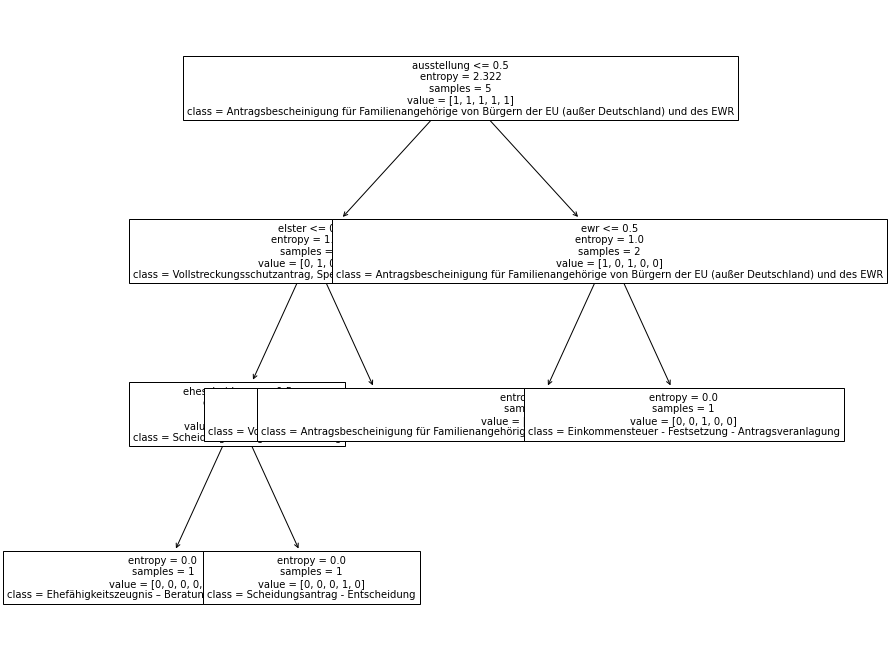

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)

class_names = df_pre["d115Name"]

tree.plot_tree(clf,feature_names = names, class_names = class_names, fontsize=10)
plt.show()

In [189]:
from sklearn.tree import export_text

text = export_text(clf, feature_names =names)
print(text)

|--- ausstellung <= 0.50
|   |--- elster <= 0.50
|   |   |--- ehescheidung <= 0.50
|   |   |   |--- class: 327098
|   |   |--- ehescheidung >  0.50
|   |   |   |--- class: 326952
|   |--- elster >  0.50
|   |   |--- class: 325685
|--- ausstellung >  0.50
|   |--- ewr <= 0.50
|   |   |--- class: 318993
|   |--- ewr >  0.50
|   |   |--- class: 326235



In [ ]:
#import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("iris") 

#dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,  class_names=iris.target_names,  filled=True, rounded=True,  special_characters=True)  
#graph = graphviz.Source(dot_data)  
#graph 

In [190]:
np.ndarray.max(matrix)

1

In [191]:
names[clf.tree_.feature[0]]

'ausstellung'

In [192]:
structure = clf.tree_

In [193]:
print(names[structure.feature[clf.tree_.children_right[0]]])
print(names[structure.feature[clf.tree_.children_left[0]]])

ewr
elster


In [168]:
print(structure.value[clf.tree_.children_right[0]])
print(structure.value[clf.tree_.children_left[0]])
structure.value[clf.tree_.children_left[0]][0][0]

[[1. 1. 1. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 1. 1. 1.]]


0.0

In [136]:
np.shape(matrix)[0]

8

In [140]:
#from sklearn.tree._tree import Tree

#help(Tree)
#help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [161]:
test = clf.decision_path(matrix)

In [162]:
test

<8x15 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [176]:
vector = structure.value[clf.tree_.children_left[0]][0]

df_pre.iloc[np.where(vector == 1)]



,id,d115Url,d115Name,ssdsAll,d115DocumentBoostValue,d115Description,d115Synonym,d115Kennung,d115Verrichtung,d115VerrichtungDetail,...,ssdsVerrichtung,ssdsVerrichtungDict,ssdsSynonym,ssdsSynonymDict,ssdsManualKeywords,_version_,d115ProcessTime,ssdsVerrichtungDetail,ssdsVerrichtungDetailDict,ssdsLemma_processed
3,120697,https://service.berlin.de/dienstleistung/120697/,Änderung/Wechsel der Hauptwohnung,"[Änderung/Wechsel der Hauptwohnung, <ul class=...",1.253521,"<ul class=""list""><li>Sie wollen Ihre bisherige...","[Anmeldung, Hauptwohnung, Hauptwohnsitz, Neben...",Wohnsitz,ummelden,,...,"[ummelden, Änderung]","[ummelden, Änderung]","[KFZ Ummeldung, Anmeldung, Hauptwohnung, Haupt...","[KFZ Ummeldung, Anmeldung, Hauptwohnung, Haupt...","[Adresse, Anmeldepflicht, Ummeldung Wohnsitz, ...",1727918339500539904,Änderungen/Wechsel der Hauptwohnung können in ...,NaN,NaN,anmeldung wohnsitz nebenwohnsitz ummelden wech...
5,324485,https://service.berlin.de/dienstleistung/324485/,Hilfe bei drohender oder bereits eingetretener...,[Hilfe bei drohender oder bereits eingetretene...,1.201195,"Sie können Hilfe bekommen,<br />\n<br />\n<ul ...","[Wohnhilfe, obdachlos, Haft, Haftentlassene, W...",Wohnungssicherung,,,...,NaN,NaN,"[Wohnhilfe, obdachlos, Haft, Niedrigschwellige...","[Wohnhilfe, obdachlos, Haft, Niedrigschwellige...",NaN,1727918340458938368,NaN,NaN,NaN,mietschuldenberatung überwindung wohnungsnotfa...
6,120335,https://service.berlin.de/dienstleistung/120335/,Abmeldung einer Wohnung,"[Abmeldung einer Wohnung, <ul class=""list""><li...",1.324734,"<ul class=""list""><li>Sie geben eine Berliner W...","[ummelden, Umzug, Wegzug, Wohnungswechsel, Abm...",Wohnsitz,abmelden,,...,"[Abmeldung, abmelden]","[Abmeldung, abmelden]","[ummelden, Umzug, Wegzug, Wohnungswechsel, Abm...","[ummelden, Umzug, Wegzug, Wohnungswechsel, Abm...","[Adresse, Anmeldepflicht, Ummeldung Wohnsitz, ...",1727918339426091008,Bei persönlicher Vorsprache in einem Bürgeramt...,NaN,NaN,umzug wohnsitz adressänderung ummelden wegzug ...
7,306684,https://service.berlin.de/dienstleistung/306684/,"Personalausweis, vorläufig, für Berliner Einwo...","[Personalausweis, vorläufig, für Berliner Einw...",1.000000,"Wenn Sie<br />\n<ul class=""list""><li>sich in B...","[vorläufiger, obdachlose, Wohnungslos, ersatz,...",NaN,NaN,NaN,...,[Ausstellung],[Ausstellung],"[vorläufiger, obdachlose, Wohnungslos, ersatz,...","[vorläufiger, obdachlose, Wohnungslos, ersatz,...","[perso, perso für Wohnungslose, perso für obda...",1727918340121296896,"Sofort, wenn alle Unterlagen vorliegen",[vorläufig für Deutsche mit Wohnsitz außerhalb...,[vorläufig für Deutsche mit Wohnsitz außerhalb...,wohnsitz vorläufig obdachlos wohnungslos besuc...
